# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sct
import statsmodels.api as stm
import matplotlib.pyplot as plt

In [2]:
from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set_style('dark')

In [3]:
athletes = pd.read_csv("./dataset/athletes.csv")
athletes.head(4)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0


In [4]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [5]:
# Checking missing data
missing = pd.DataFrame({
                        'missing': athletes.isna().sum(),
                        'missing %': (athletes.isna().sum() / athletes.shape[0]) * 100
                        })
missing

,missing,missing %
id,0,0.000000
name,0,0.000000
nationality,0,0.000000
sex,0,0.000000
dob,1,0.008667
height,330,2.860114
weight,659,5.711562
sport,0,0.000000
gold,0,0.000000
silver,0,0.000000


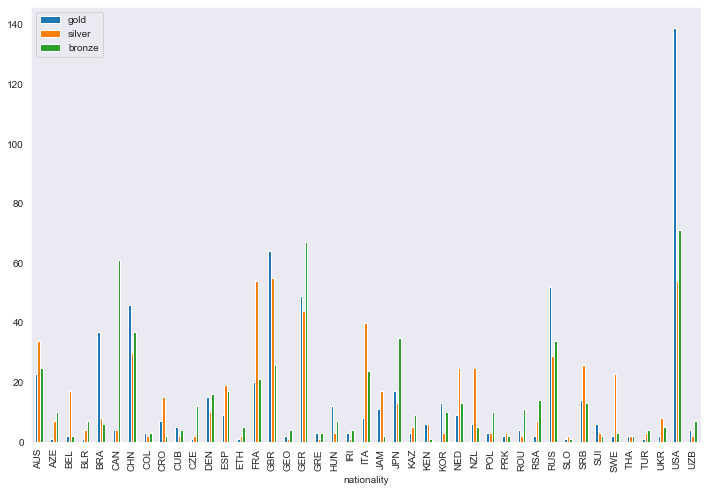

In [6]:
# Sample of countries which achieved one medal or more
medal_types = ['gold', 'silver', 'bronze']
country_medals = athletes.groupby("nationality")[medal_types].sum()

medals_greater = country_medals[(country_medals[medal_types[0]] > 0) &
                (country_medals[medal_types[1]] > 0) &
                (country_medals[medal_types[2]] > 0)]

# Visualization
medals_greater.plot(kind='bar', y=medal_types)

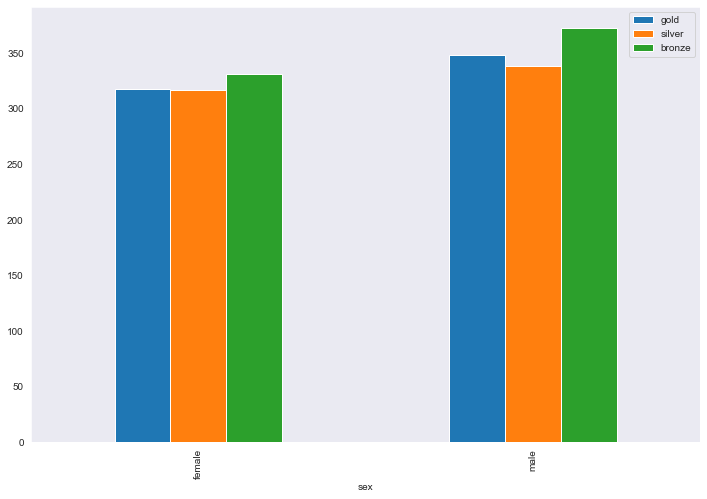

In [7]:
# Medals per sex
athletes.groupby("sex")[medal_types].sum().plot(kind='bar')

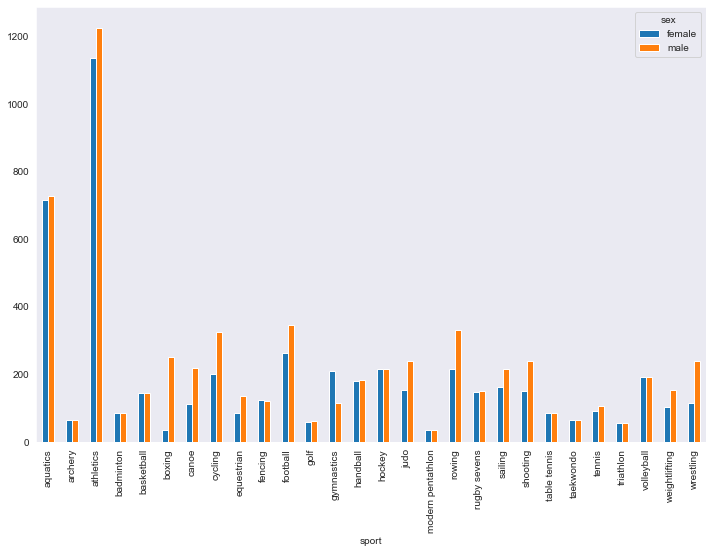

In [8]:
# Proportion of gender by sport
# Dentro disso, qual a quantidade de medalhas por gênero, por esporte
sport_by_gender = athletes.groupby(['sport', 'sex'])['nationality'].count().unstack()
sport_by_gender.plot(kind='bar')

In [9]:
#athletes.groupby("sport")[medal_types].sum()
#athletes.groupby('sport').agg({'nationality': 'count', 'sex': 'count'})

In [10]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [11]:
# Sua análise começa aqui.


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q1():
    # Retorne aqui o resultado da questão 1.
    # Hypothesis
    # H0: heights follow gaussian distribution 
    # H1: heights do not follow gaussian distribution
    # True: accept H0
    # False: reject H0

    sample_height = get_sample(df=athletes, col_name='height', n=3000)
    test, pvalue = sct.shapiro(sample_height)

    if pvalue > 0.05:
        return True
    else:
        return False
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [13]:
# Check if exist any null data in sample height
sample_height = get_sample(df=athletes, col_name='height', n=3000)
sample_height.isna().sum()

0

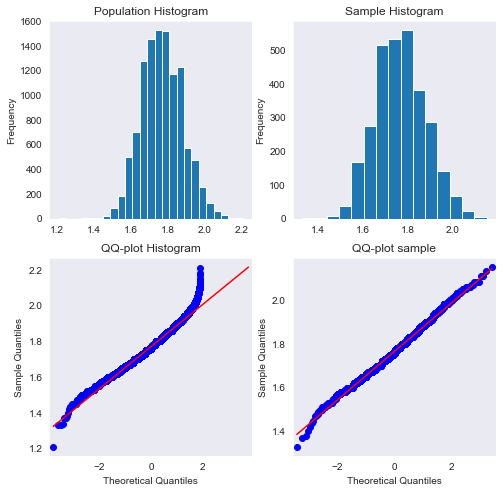

In [14]:
# Visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax = ax.flatten()

# Population and sample histograms
athletes['height'].plot(kind='hist', bins=25, ax=ax[0])
sample_height = get_sample(df=athletes, col_name='height', n=3000)
sample_height.plot(kind='hist', bins=15, ax=ax[1])

# QQ-plot
stm.qqplot(athletes['height'], line='q', ax=ax[2])
stm.qqplot(sample_height, line='q', ax=ax[3])

# Adding plot titles
titles = ['Population Histogram', 'Sample Histogram', 'QQ-plot Histogram', 'QQ-plot sample']
for ax_order, title in zip(ax, titles):
    ax_order.set_title(title)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [15]:
def q2():
    # Retorne aqui o resultado da questão 2.
    # Hypothesis
    # H0: heights follow gaussian distribution 
    # H1: heights do not follow gaussian distribution
    # True: accept H0
    # False: reject H0

    sample_height = get_sample(df=athletes, col_name='height', n=3000)
    test, pvalue = sct.jarque_bera(sample_height)

    if pvalue > 0.05:
        return True
    else:
        return False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
def q3():
    # Retorne aqui o resultado da questão 3.
    # Hypothesis
    # H0: weight follow gaussian distribution 
    # H1: weight do not follow gaussian distribution
    # True: accept H0
    # False: reject H0

    sample_weight = get_sample(df=athletes, col_name='weight', n=3000)
    test, pvalue = sct.normaltest(sample_weight)

    if pvalue > 0.05:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

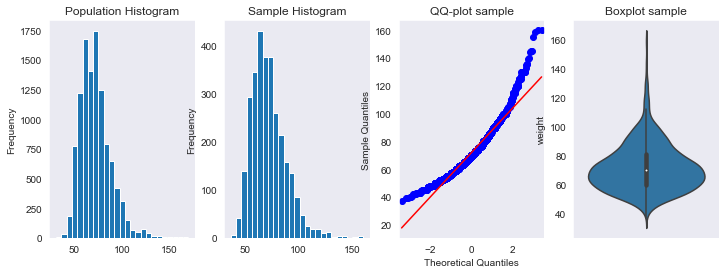

In [17]:
# Visualization
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
ax = ax.flatten()

# Population and sample histograms
athletes['weight'].plot(kind='hist', bins=25, ax=ax[0])
sample_weight = get_sample(df=athletes, col_name='weight', n=3000)
sample_weight.plot(kind='hist', bins=25, ax=ax[1])

# QQ-plot
stm.qqplot(sample_weight, line='r', ax=ax[2])

# Boxplot
sns.violinplot(sample_weight, orient='v', ax=ax[3])

# Adding plot titles
titles = ['Population Histogram', 'Sample Histogram', 'QQ-plot sample', 'Boxplot sample']
for ax_order, title in zip(ax, titles):
    ax_order.set_title(title)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [18]:
def q4():
    # Retorne aqui o resultado da questão 4.
    sample_weight = get_sample(df=athletes, col_name='weight', n=3000)
    sample_weight_log = np.log(sample_weight)
    test, pvalue = sct.normaltest(sample_weight_log)

    if pvalue > 0.05:
        return True
    else:
        return False
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

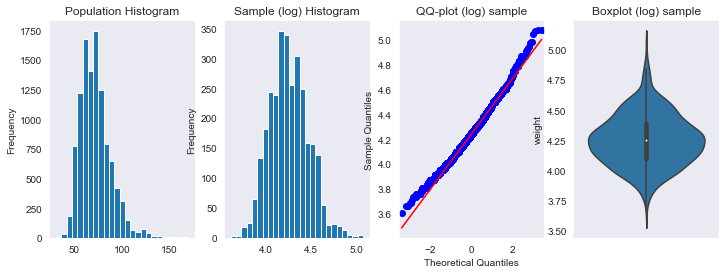

In [19]:
# Visualization
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
ax = ax.flatten()

# Population and sample histograms
athletes['weight'].plot(kind='hist', bins=25, ax=ax[0])
sample_weight_log = np.log(sample_weight)
sample_weight_log.plot(kind='hist', bins=25, ax=ax[1])

# QQ-plot
stm.qqplot(sample_weight_log, line='q', ax=ax[2])

# Boxplot
sns.violinplot(sample_weight_log, orient='v', ax=ax[3])

# Adding plot titles
titles = ['Population Histogram', 'Sample (log) Histogram', 'QQ-plot (log) sample', 'Boxplot (log) sample']
for ax_order, title in zip(ax, titles):
    ax_order.set_title(title)
    

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [20]:
# Create country dataframes
bra = athletes[athletes['nationality'] == 'BRA']
can = athletes[athletes['nationality'] == 'CAN']
usa = athletes[athletes['nationality'] == 'USA']

In [30]:
# Checking misising data
def count_missing(dataframe):
    df = pd.DataFrame({'missing': dataframe.isna().sum(),
                    'missing %': (dataframe.isna().sum() / dataframe.shape[0]) * 100})
    return df

for df in [bra, can, usa]:
    a = count_missing(df)
    print(a.loc['height', :])

missing      9.00000
missing %    1.85567
Name: height, dtype: float64
missing      1.000000
missing %    0.311526
Name: height, dtype: float64
missing      7.000000
missing %    1.234568
Name: height, dtype: float64


Mean: BRA 1.764033613445378, 
                CAN 1.75859375, 
                USA 1.787767857142857
VAR: BRA 0.013779906236178682, 
                CAN 0.013932499020376172, 
                USA 0.014151895923843595


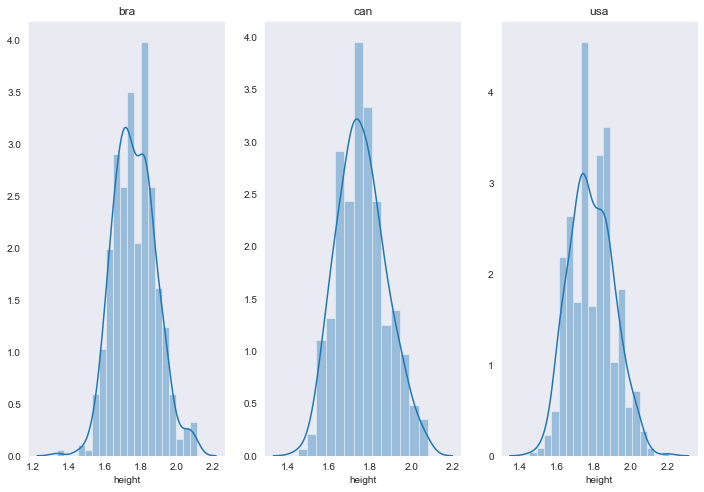

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()

for df, ax, name in zip([bra, can, usa], axes, ['bra', 'can', 'usa']):
    sns.distplot(df['height'].dropna(), ax=ax)
    ax.set_title(name)

print(f"""Mean: BRA {bra['height'].mean()}, 
                CAN {can['height'].mean()}, 
                USA {usa['height'].mean()}""")
print(f"""VAR: BRA {bra['height'].var()}, 
                CAN {can['height'].var()}, 
                USA {usa['height'].var()}""")

In [33]:
def q5():
    # Retorne aqui o resultado da questão 5.
    # Hypothesis
    # H0: BRA and USA have same means 
    # H1: BRA and USA dont have same means
    test, pvalue = sct.ttest_ind(bra['height'], usa['height'],
                                nan_policy='omit',
                                equal_var=False)
    
    if pvalue > 0.05:
        return True
    else:
        return False
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [25]:
def q6():
    # Retorne aqui o resultado da questão 6.
    # Hypothesis
    # H0: BRA and CAN have same means 
    # H1: BRA and CAN dont have same means
    test, pvalue = sct.ttest_ind(bra['height'], can['height'], 
                                nan_policy='omit',
                                equal_var=False)
    if pvalue > 0.05:
        return True
    else:
        return False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [35]:
def q7():
    # Retorne aqui o resultado da questão 7.
    # Hypothesis
    # H0: USA and CAN have same means 
    # H1: USA and CAN dont have same means
    test, pvalue = sct.ttest_ind(can['height'], usa['height'], 
                                nan_policy='omit',
                                equal_var=False)

    return float(round(pvalue, 8))